In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

# Membaca data dari URL JSON
url = "https://gist.githubusercontent.com/nadirbslmh/93b62fdcfa694d4ec07bed9b3c94e401/raw/c07971341361e23fd4f3a880437c4d8e4ebcfafc/stock_trades.json"
response = requests.get(url)
data = json.loads(response.text)

# Membuat DataFrame dari data JSON
df = pd.DataFrame(data)

# Mengonversi harga saham ke dalam satuan Rupiah (IDR)
df['trade_price'] = df.apply(lambda x: x['trade_price'] * 14400 if x['currency'] == 'USD' else x['trade_price'], axis=1)

# Mengubah tipe data kolom tanggal menjadi datetime
df['trade_date'] = pd.to_datetime(df['trade_date'])

# Menambahkan kolom tahun dari kolom trade_date
df['year'] = df['trade_date'].dt.year

# Menampilkan lima baris pertama dari DataFrame setelah praproses
df.head()

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency,year
0,1,GOOGL,2017-01-05,3,675.51,501030,1,1,sell,EUR,2017
1,2,NVDA,2017-03-27,13,559.39,51823,2,2,buy,ZAR,2017
2,3,NFLX,2015-11-07,0,811.33,684430,3,3,sell,ZWL,2015
3,4,MSFT,2017-05-29,22,231.21,237465,4,4,buy,IDR,2017
4,5,JPM,2012-11-08,16,699.15,800344,5,5,buy,HRK,2012


In [2]:
# Harga beli saham tertinggi dalam Rupiah (IDR)
highest_price = df[df['trade_type'] == 'buy']['trade_price'].max()
print("Harga beli saham tertinggi dalam IDR:", highest_price)

Harga beli saham tertinggi dalam IDR: 12958272.0


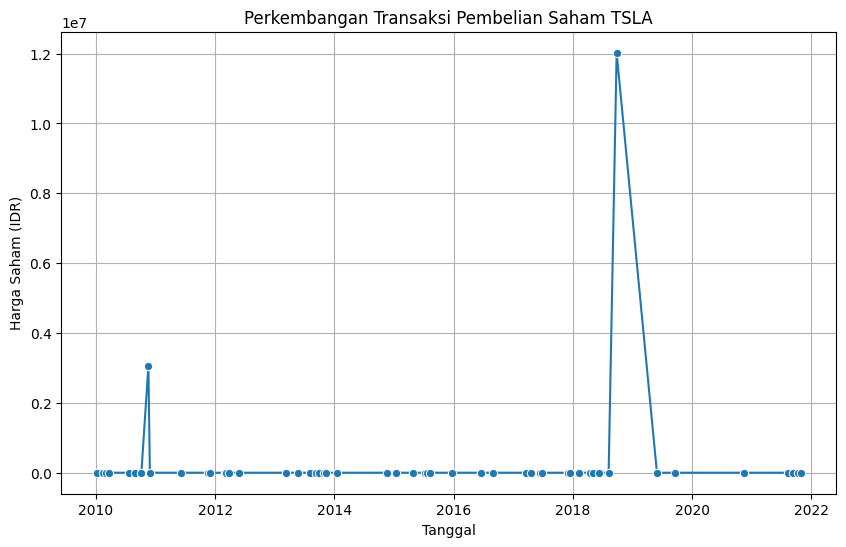

In [3]:
# Perkembangan transaksi pembelian saham TSLA
tsla_trades = df[(df['stock_symbol'] == 'TSLA') & (df['trade_type'] == 'buy')]
plt.figure(figsize=(10, 6))
sns.lineplot(x=tsla_trades['trade_date'], y=tsla_trades['trade_price'], marker='o')
plt.title('Perkembangan Transaksi Pembelian Saham TSLA')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (IDR)')
plt.grid(True)
plt.show()

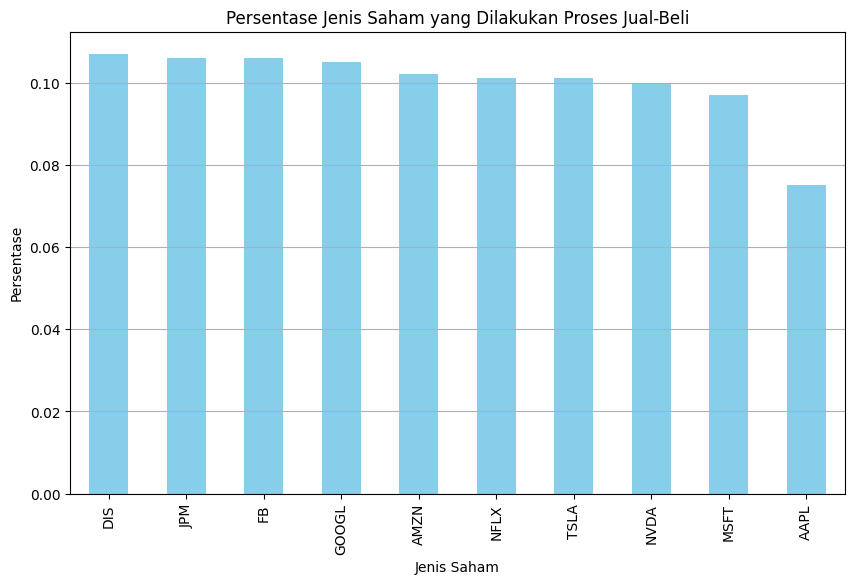

In [4]:
# Persentase jenis saham yang dilakukan proses jual-beli
plt.figure(figsize=(10, 6))
df['stock_symbol'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Persentase Jenis Saham yang Dilakukan Proses Jual-Beli')
plt.xlabel('Jenis Saham')
plt.ylabel('Persentase')
plt.grid(axis='y')
plt.show()

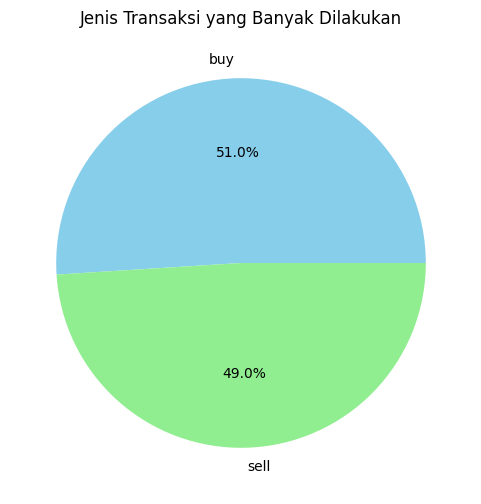

In [5]:
# Jenis transaksi yang banyak dilakukan (buy / sell)
plt.figure(figsize=(6, 6))
df['trade_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Jenis Transaksi yang Banyak Dilakukan')
plt.ylabel('')
plt.show()

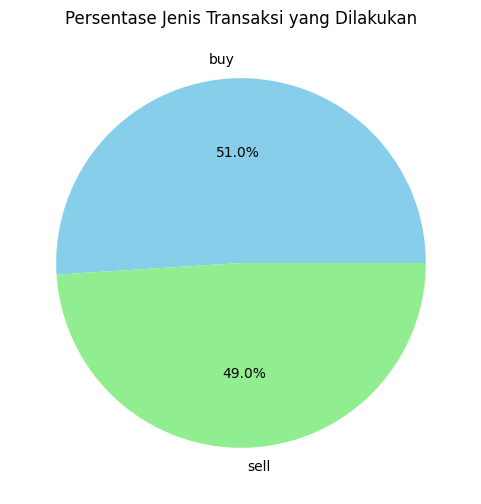

In [6]:
# Persentase jenis transaksi yang dilakukan
plt.figure(figsize=(6, 6))
df['trade_type'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Persentase Jenis Transaksi yang Dilakukan')
plt.ylabel('')
plt.show()

In [7]:
# Rata-rata nilai transaksi jual pada setiap tahun untuk semua jenis saham
average_trade_price = df[df['trade_type'] == 'sell'].groupby('year')['trade_price'].mean()
print("Rata-rata nilai transaksi jual pada setiap tahun:\n", average_trade_price)

Rata-rata nilai transaksi jual pada setiap tahun:
 year
2010    330638.386970
2011    106619.701739
2012    151265.133243
2013    273297.620769
2014    949859.012941
2015    323207.332222
2016    132643.873256
2017    558442.468298
2018    301059.506000
2019       519.863514
2020    266310.882857
2021    168480.183571
Name: trade_price, dtype: float64
